In [34]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from nltk.corpus import stopwords
nltk.download('stopwords')
from CleanData import clean_comment, get_bag_of_words
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to C:\Users\Zehan
[nltk_data]     Chao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Load all article reviews:
media_bias = pd.read_csv('../data/MediaBiasChart.csv')
media_bias = media_bias.groupby('Source').mean()
media_bias.reset_index(level=0, inplace=True)
media_bias

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,Al Jazeera,-3.705333,46.700000
3,Alternet,-19.156250,26.385000
4,"American Spectator, The",21.767778,23.481111
...,...,...,...
103,Washington Times,12.966667,37.228000
104,Weather.com,-2.434000,51.300000
105,Wonkette,-27.716154,17.336923
106,World Truth TV,8.480769,15.262308


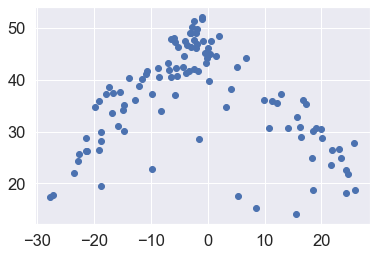

In [25]:
plt.scatter(media_bias['Bias'].to_numpy(),media_bias['Quality'].to_numpy())

In [26]:
# A hand-make dictionary mapping each media in MediaBiasChart_to_Tweet to their twitter account name
# The full list of media twitter account is from news_outlet_tweet_IDs
# at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/2FIFLH

MediaBiasChart_to_Tweet = {'ABC':'ABC','AP':'AP','Axios':'axios','CNN':'CNN','Wall Street Journal':'WSJ',\
    'The Atlantic':'TheAtlantic','The Hill':'thehill', 'BBC':'BBC', 'Think Progress':'thinkprogress',\
    'MSNBC':'MSNBC','The Nation':'thenation','Daily Beast':'thedailybeast','Mother Jones':'MotherJones',\
    'CNSNews':'cnsnews','Fox News':'FoxNews', 'The Federalist':'FDRLST','Breitbart':'BreitbartNews',\
    'Daily Caller':'DailyCaller','The Blaze':'theblaze','Business Insider':'businessinsider',\
    'CBS':'CBSNews','The Economist':'TheEconomist','BuzzFeed':'BuzzFeed','Daily Signal':'DailySignal',\
    'New Republic':'newrepublic','Foreign Policy':'ForeignPolicy','IJR':'TheIJR','National Review':'NRO',\
    'National Public Radio':'NPR','New York Post':'nypost','New York Times':'nytimes','The New Yorker':'NewYorker',\
    'NewsMax':'newsmax','One America News Network':'OANN','Politico':'politico','Quartz':'qz',\
    'Reason':'reason','Reuters':'Reuters','Slate':'Slate','Talking Points Memo':'TPM','Vanity Fair':'VanityFair',\
    'Vox':'voxdotcom','Washington Examiner':'dcexaminer','Washington Free Beacon':'FreeBeacon',\
    'Washington Post':'washingtonpost','Washington Times':'WashTimes','The Week':'TheWeek','Bloomberg':'Bloomberg',\
    'Christian Science Monitor':'csmonitor', 'Democracy Now':'democracynow','Financial Times':'FT',\
    'Fiscal Times':'TheFiscalTimes','Forbes':'Forbes','Fortune':'FortuneMagazine','Forward':'jdforward',\
    'FreeSpeech TV':'freespeechtv','Huffington Post':'HuffPost','LA Times':'latimes','Marketwatch':'MarketWatch',\
    'OZY':'ozy','PBS':'PBS','ProPublica':'ProPublica','Time':'TIME','USA Today':'USATODAY',\
    'Weather.com':'weatherchannel'}

media_bias.Source.map(MediaBiasChart_to_Tweet)

0                 ABC
1                  AP
2                 NaN
3                 NaN
4                 NaN
            ...      
103         WashTimes
104    weatherchannel
105               NaN
106               NaN
107               NaN
Name: Source, Length: 108, dtype: object

In [27]:
media_bias['twitter_name'] = media_bias.Source.map(MediaBiasChart_to_Tweet)
media_bias = media_bias.dropna()
media_bias.reset_index(drop=True)
all_media = media_bias['twitter_name'].tolist()

In [28]:
all_media

['ABC',
 'AP',
 'axios',
 'BBC',
 'Bloomberg',
 'BreitbartNews',
 'businessinsider',
 'BuzzFeed',
 'CBSNews',
 'CNN',
 'cnsnews',
 'csmonitor',
 'thedailybeast',
 'DailyCaller',
 'DailySignal',
 'democracynow',
 'FT',
 'TheFiscalTimes',
 'Forbes',
 'ForeignPolicy',
 'FortuneMagazine',
 'jdforward',
 'FoxNews',
 'freespeechtv',
 'HuffPost',
 'TheIJR',
 'latimes',
 'MSNBC',
 'MarketWatch',
 'MotherJones',
 'NPR',
 'NRO',
 'newrepublic',
 'nypost',
 'nytimes',
 'newsmax',
 'ozy',
 'OANN',
 'PBS',
 'politico',
 'ProPublica',
 'qz',
 'reason',
 'Reuters',
 'Slate',
 'TPM',
 'TheAtlantic',
 'theblaze',
 'TheEconomist',
 'FDRLST',
 'thehill',
 'thenation',
 'NewYorker',
 'TheWeek',
 'thinkprogress',
 'TIME',
 'USATODAY',
 'VanityFair',
 'voxdotcom',
 'WSJ',
 'dcexaminer',
 'FreeBeacon',
 'washingtonpost',
 'WashTimes',
 'weatherchannel']

In [ ]:
tweets_df = pd.read_csv('../data/news_outlets_part6.csv')
tweets_df = tweets_df.loc[tweets_df['user_screen_name'].isin(all_media)]

In [36]:
tweets_df_filtered = tweets_df[['user_screen_name', 'text', 'created_at', 'hashtags']]
tweets_df_filtered.shape

(120514, 4)

In [38]:
tweets_df_filtered.to_csv('../data/filtered_part6.csv',index=False)

In [39]:
df = pd.read_csv('../data/filtered_part6.csv')
df.head(5)

,user_screen_name,text,created_at,hashtags
0,reason,"Westworld Review: ‘Shogun World’ Is a Video Game, and Maeve Is Leveling Up https://t.co/m36XPa9p5y",Mon May 21 22:41:00 +0000 2018,NaN
1,reason,"Over the next 30 years, Texas may overtake the Golden State because it is more welcoming to newcomers.\n https://t.co/9FIOIswbxd",Mon May 21 23:33:00 +0000 2018,NaN
2,reason,Can't bust some guy for smoking a joint on the stairs. What's the world coming to?\n https://t.co/jMiE3a0s8U,Tue May 22 00:26:00 +0000 2018,NaN
3,reason,Steven Pinker Loves the Enlightenment https://t.co/JTN0Zks05t,Mon May 21 22:18:00 +0000 2018,NaN
4,reason,More than 7 million Americans may have suspended licenses for unpaid traffic tickets and court fines. Critics say the practice traps the poor in a debt spiral https://t.co/Me2aj2YzRo,Mon May 21 19:54:30 +0000 2018,NaN
